In [2]:
import pandas as pd
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import json

sns.set_style("whitegrid")
sns.set_context("poster", font_scale=0.75)
sns.set_palette("colorblind")

def parse_frag(file: Path) -> pd.DataFrame:
    raw = file.read_text()
    data = ""
    for line in raw.splitlines():
        data += line + ((len(line) + 31) // 32 * 32 - len(line)) * "0"
    huge_pages = len(data)
    out = np.zeros(huge_pages)
    for i, char in enumerate(data):
        level = int(char)
        assert(0 <= level <= 9)
        out[i] = float(level)
    # out = out.reshape(((huge_pages + 31) // 32, 32))
    return pd.DataFrame(out)


## Linux

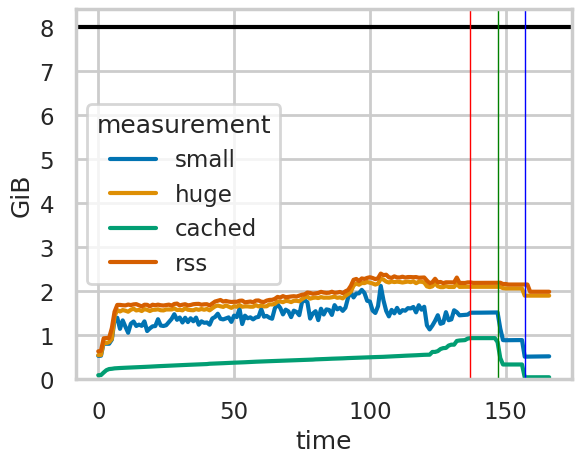

In [6]:
# Buddy, Free-Page-Reporting, 8G, 8C
root = Path("compiling/240411-152344-linux-base-auto")
max_mem = 8*1024**3
data = pd.read_csv(root / "out_0.csv")
data["small"] = max_mem - data["small"] * 2**12
data["huge"] = max_mem - data["huge"] * 2**(12+9)
data["alloc"] = "LLFree"
data["time"] = data.index
data = data.melt(
    id_vars=["alloc", "time"],
    var_name="measurement",
    value_name="bytes",
    value_vars=["small", "huge", "cached", "rss"])
times = json.load((root / "times_0.json").open())

p = sns.lineplot(data=data, x="time", y="bytes", hue="measurement")
p.set_yticks(ticks=[x for x in range(0, max_mem + 1, 1024**3)],
             labels=[str(x // 1024**3) for x in range(0, max_mem + 1, 1024**3)])
p.set_ylim(0, max_mem * 1.05)
p.set_ylabel("GiB")
p.axhline(y=max_mem, color="black")
p.axvline(x=times["build"], color="red", linewidth=1)
p.axvline(x=times["delay"], color="green", linewidth=1)
p.axvline(x=times["clean"], color="blue", linewidth=1)

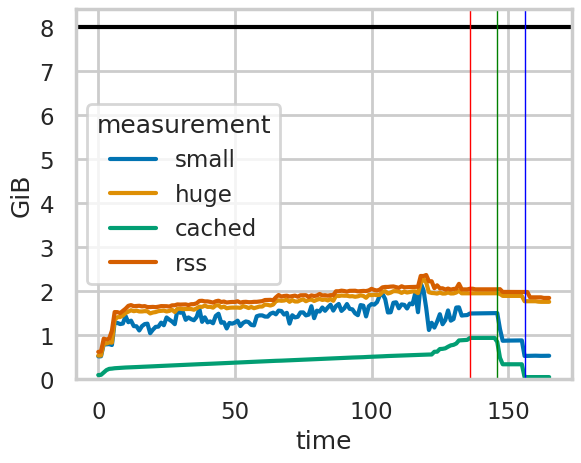

In [9]:
# Virtio Huge, Auto, 8G, 8C
root = Path("compiling/240411-145919-linux-huge-auto")
max_mem = 8*1024**3
data = pd.read_csv(root / "out_0.csv")
data["small"] = max_mem - data["small"] * 2**12
data["huge"] = max_mem - data["huge"] * 2**(12+9)
data["alloc"] = "LLFree"
data["time"] = data.index
data = data.melt(
    id_vars=["alloc", "time"],
    var_name="measurement",
    value_name="bytes",
    value_vars=["small", "huge", "cached", "rss"])
times = json.load((root / "times_0.json").open())

p = sns.lineplot(data=data, x="time", y="bytes", hue="measurement")
p.set_yticks(ticks=[x for x in range(0, max_mem + 1, 1024**3)],
             labels=[str(x // 1024**3) for x in range(0, max_mem + 1, 1024**3)])
p.set_ylim(0, max_mem * 1.05)
p.set_ylabel("GiB")
p.axhline(y=max_mem, color="black")
p.axvline(x=times["build"], color="red", linewidth=1)
p.axvline(x=times["delay"], color="green", linewidth=1)
p.axvline(x=times["clean"], color="blue", linewidth=1)

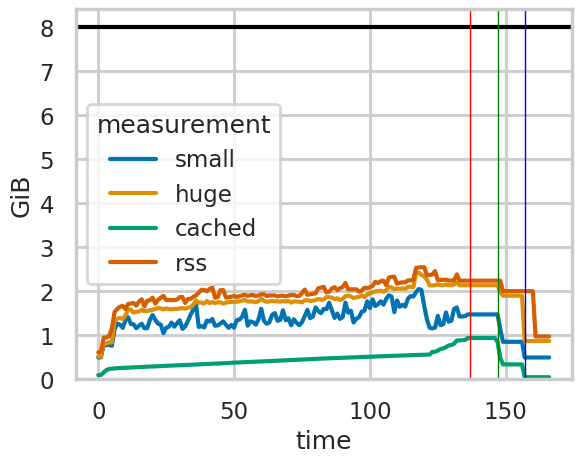

In [3]:
# LLFree, Auto, 8G, 8C
root = Path("compiling/240415-112323-linux-llfree-auto")
max_mem = 8*1024**3
data = pd.read_csv(root / "out_0.csv")
data["small"] = max_mem - data["small"] * 2**12
data["huge"] = max_mem - data["huge"] * 2**(12+9)
data["alloc"] = "LLFree"
data["time"] = data.index
data = data.melt(
    id_vars=["alloc", "time"],
    var_name="measurement",
    value_name="bytes",
    value_vars=["small", "huge", "cached", "rss"])
times = json.load((root / "times_0.json").open())

p = sns.lineplot(data=data, x="time", y="bytes", hue="measurement")
p.set_yticks(ticks=[x for x in range(0, max_mem + 1, 1024**3)],
             labels=[str(x // 1024**3) for x in range(0, max_mem + 1, 1024**3)])
p.set_ylim(0, max_mem * 1.05)
p.set_ylabel("GiB")
p.axhline(y=max_mem, color="black")
p.axvline(x=times["build"], color="red", linewidth=1)
p.axvline(x=times["delay"], color="green", linewidth=1)
p.axvline(x=times["clean"], color="blue", linewidth=1)

## Clang

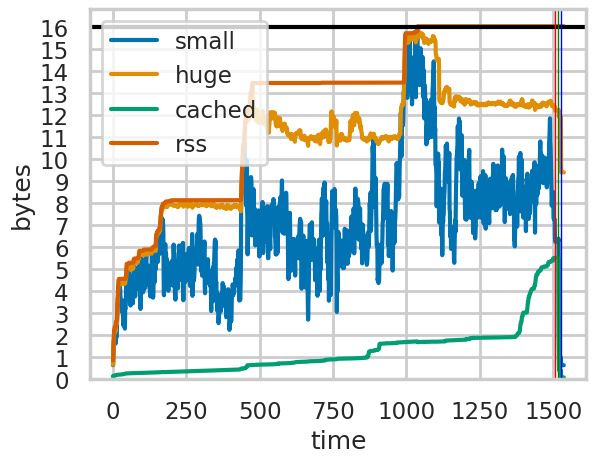

In [3]:
# Buddy, None, 16G, 8C
root = Path("compiling/240410-221024-base-manual")
max_mem = 16*1024**3
data = pd.read_csv(root / "out_0.csv")
data["small"] = max_mem - data["small"] * 2**12
data["huge"] = max_mem - data["huge"] * 2**(12+9)
data["alloc"] = "LLFree"
data["time"] = data.index
data = data.melt(
    id_vars=["alloc", "time"],
    var_name="measurement",
    value_name="bytes",
    value_vars=["small", "huge", "cached", "rss"])
times = json.load((root / "times_0.json").open())

p = sns.lineplot(data=data, x="time", y="bytes", hue="measurement")
p.legend(title=None)
p.set_ylim(0, max_mem * 1.05)
p.set_yticks(ticks=[x for x in range(0, max_mem + 1, 1024**3)],
             labels=[str(x // 1024**3) for x in range(0, max_mem + 1, 1024**3)])
p.axhline(y=max_mem, color="black")
p.axvline(x=times["build"], color="red", linewidth=1)
p.axvline(x=times["delay"], color="green", linewidth=1)
p.axvline(x=times["clean"], color="blue", linewidth=1)

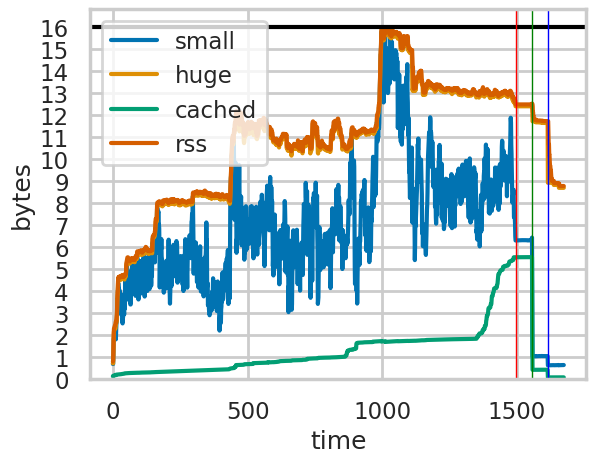

In [3]:
# Buddy, Auto, 16G, 8C
root = Path("compiling/240415-113158-clang-base-auto")
max_mem = 16*1024**3
data = pd.read_csv(root / "out_0.csv")
data["small"] = max_mem - data["small"] * 2**12
data["huge"] = max_mem - data["huge"] * 2**(12+9)
data["alloc"] = "LLFree"
data["time"] = data.index
data = data.melt(
    id_vars=["alloc", "time"],
    var_name="measurement",
    value_name="bytes",
    value_vars=["small", "huge", "cached", "rss"])
times = json.load((root / "times_0.json").open())

p = sns.lineplot(data=data, x="time", y="bytes", hue="measurement", legend="brief")
p.legend(title=None)
p.set_ylim(0, max_mem * 1.05)
p.set_yticks(ticks=[x for x in range(0, max_mem + 1, 1024**3)],
             labels=[str(x // 1024**3) for x in range(0, max_mem + 1, 1024**3)])
p.axhline(y=max_mem, color="black")
p.axvline(x=times["build"], color="red", linewidth=1)
p.axvline(x=times["delay"], color="green", linewidth=1)
p.axvline(x=times["clean"], color="blue", linewidth=1)

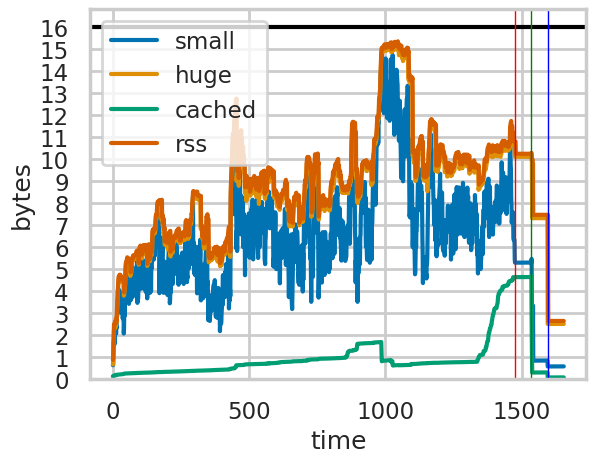

In [4]:
# LLFree, Auto, 16G, 8C
root = Path("compiling/240415-121239-clang-llfree-auto")
max_mem = 16*1024**3
data = pd.read_csv(root / "out_0.csv")
data["small"] = max_mem - data["small"] * 2**12
data["huge"] = max_mem - data["huge"] * 2**(12+9)
data["alloc"] = "LLFree"
data["time"] = data.index
data = data.melt(
    id_vars=["alloc", "time"],
    var_name="measurement",
    value_name="bytes",
    value_vars=["small", "huge", "cached", "rss"])

times = json.load((root / "times_0.json").open())


p = sns.lineplot(data=data, x="time", y="bytes", hue="measurement", legend="brief")
p.legend(title=None)
p.set_ylim(0, max_mem * 1.05)
p.set_yticks(ticks=[x for x in range(0, max_mem + 1, 1024**3)],
             labels=[str(x // 1024**3) for x in range(0, max_mem + 1, 1024**3)])
p.axhline(y=max_mem, color="black")
p.axvline(x=times["build"], color="red", linewidth=1)
p.axvline(x=times["delay"], color="green", linewidth=1)
p.axvline(x=times["clean"], color="blue", linewidth=1)

/srv/scratch/wrenger/llfree-ballooning/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/srv/scratch/wrenger/llfree-ballooning/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


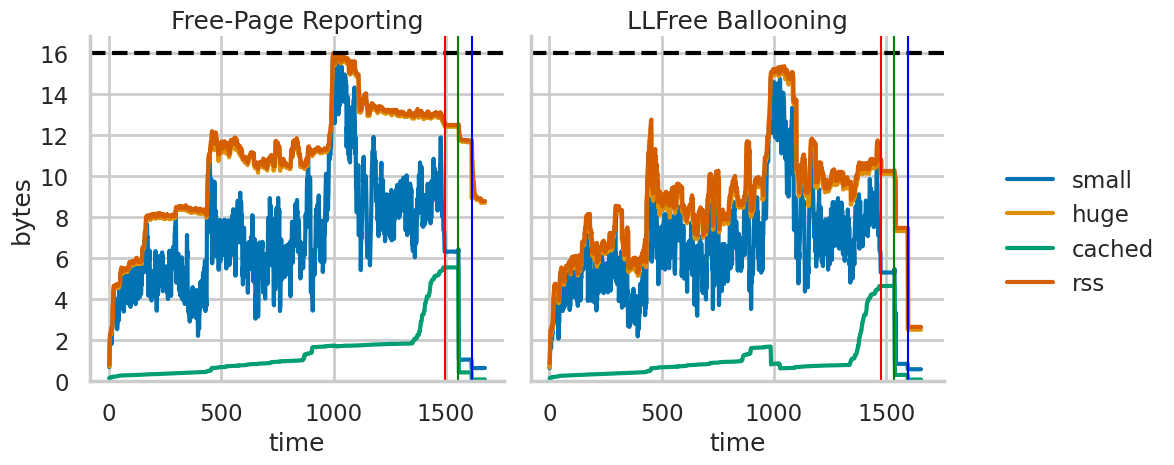

In [9]:
# LLFree, Auto, 16G, 8C
root_bu = Path("compiling/240415-113158-clang-base-auto")
root_ll = Path("compiling/240415-121239-clang-llfree-auto")

max_mem = 16*1024**3
data_bu = pd.read_csv(root_bu / "out_0.csv")
data_bu["mode"] = "Free-Page Reporting"
data_ll = pd.read_csv(root_ll / "out_0.csv")
data_ll["mode"] = "LLFree Ballooning"
data = pd.concat([data_bu, data_ll])

data["small"] = max_mem - data["small"] * 2**12
data["huge"] = max_mem - data["huge"] * 2**(12+9)
data["time"] = data.index
data = data.melt(
    id_vars=["mode", "time"],
    var_name="measurement",
    value_name="bytes",
    value_vars=["small", "huge", "cached", "rss"])

times_bu = json.load((root_bu / "times_0.json").open())
times_ll = json.load((root_ll / "times_0.json").open())

p = sns.relplot(data=data, kind="line", x="time", y="bytes", col="mode", hue="measurement", legend="brief", height=5)
p.legend.set_title(None)
p.set_titles("{col_name}")
p.set(ylim=(0, max_mem * 1.05))
p.set(yticks=[x for x in range(0, max_mem + 1, 2*1024**3)],
      yticklabels=[str(x // 1024**3) for x in range(0, max_mem + 1, 2*1024**3)])
p.refline(y=max_mem, color="black")
p.facet_axis(0, 0).axvline(x=times_bu["build"], color="red", linewidth=1.5)
p.facet_axis(0, 0).axvline(x=times_bu["delay"], color="green", linewidth=1.5)
p.facet_axis(0, 0).axvline(x=times_bu["clean"], color="blue", linewidth=1.5)
p.facet_axis(0, 1).axvline(x=times_ll["build"], color="red", linewidth=1.5)
p.facet_axis(0, 1).axvline(x=times_ll["delay"], color="green", linewidth=1.5)
p.facet_axis(0, 1).axvline(x=times_ll["clean"], color="blue", linewidth=1.5)


## SPEC17 Blender

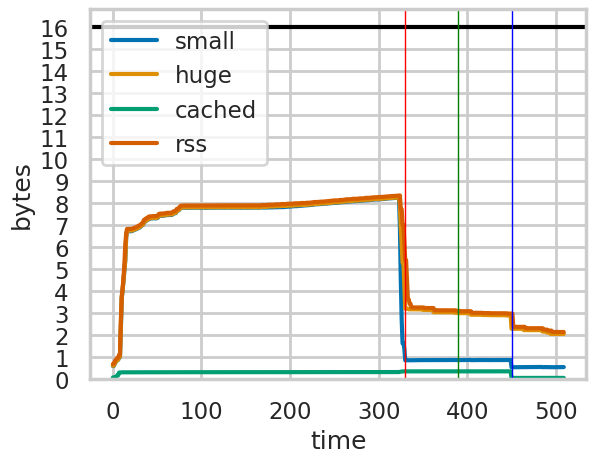

In [15]:
# LLFree, Auto, 16G, 8C
root = Path("compiling/240415-145034-blender-base-auto")
max_mem = 16*1024**3
data = pd.read_csv(root / "out_0.csv")
data["small"] = max_mem - data["small"] * 2**12
data["huge"] = max_mem - data["huge"] * 2**(12+9)
data["alloc"] = "LLFree"
data["time"] = data.index
data = data.melt(
    id_vars=["alloc", "time"],
    var_name="measurement",
    value_name="bytes",
    value_vars=["small", "huge", "cached", "rss"])

times = json.load((root / "times_0.json").open())


p = sns.lineplot(data=data, x="time", y="bytes", hue="measurement", legend="brief")
p.legend(title=None)
p.set_ylim(0, max_mem * 1.05)
p.set_yticks(ticks=[x for x in range(0, max_mem + 1, 1024**3)],
             labels=[str(x // 1024**3) for x in range(0, max_mem + 1, 1024**3)])
p.axhline(y=max_mem, color="black")
p.axvline(x=times["build"], color="red", linewidth=1)
p.axvline(x=times["delay"], color="green", linewidth=1)
p.axvline(x=times["clean"], color="blue", linewidth=1)